In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r"C:\Users\81702\kagglechallnge\home-data-for-ml-course\train.csv", encoding="utf-8")
test = pd.read_csv(r"C:\Users\81702\kagglechallnge\home-data-for-ml-course\test.csv", encoding="utf-8")

In [3]:
print(test.shape)
print(train.shape)

(1459, 80)
(1460, 81)


In [4]:
#test data contains new obsevations
#Merge a train data and a test data so that 
#Label encoder can be used
train_test_merged = pd.concat([train, test], ignore_index=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

need_label = []
for c in train_test_merged:
    if train_test_merged[c].dtype == object:
        need_label.append(c)
        
print(need_label)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [6]:
for c_1 in need_label:
    le = LabelEncoder()
    le.fit(train_test_merged[c_1].fillna("NA"))
    
    train_test_merged[c_1] = le.transform(train_test_merged[c_1].fillna("NA"))

In [7]:
train = train_test_merged.iloc[:1460, :] 
test =  train_test_merged.iloc[1460:, :]
train = train.drop(["Id"], axis=1)

In [8]:
test = test.drop(["SalePrice", "Id"], axis=1)

In [9]:
train_x = train.drop(["SalePrice"], axis=1)
train_y = train["SalePrice"]

In [10]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,9,4,208500.0
1,20,4,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,9,4,181500.0
2,60,4,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,9,4,223500.0
3,70,4,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,9,0,140000.0
4,60,4,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,9,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,4,62.0,7917,1,1,3,3,0,4,...,0,3,4,1,0,8,2007,9,4,175000.0
1456,20,4,85.0,13175,1,1,3,3,0,4,...,0,3,2,1,0,2,2010,9,4,210000.0
1457,70,4,66.0,9042,1,1,3,3,0,4,...,0,3,0,3,2500,5,2010,9,4,266500.0
1458,20,4,68.0,9717,1,1,3,3,0,4,...,0,3,4,1,0,4,2010,9,4,142125.0


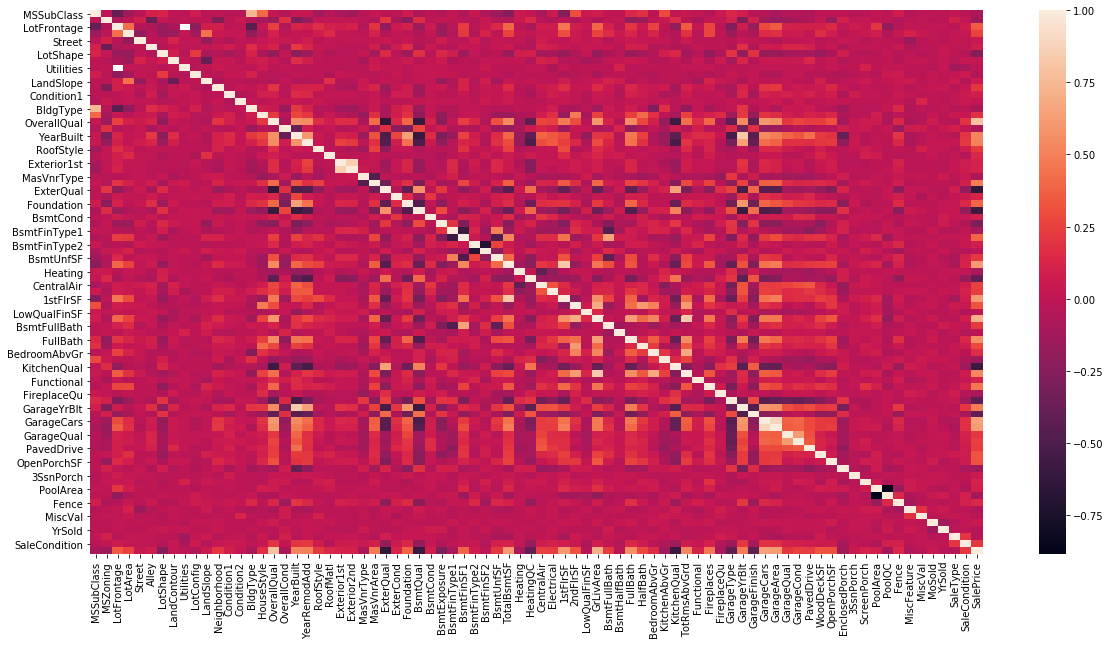

In [11]:
train_corr = train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(train_corr)

In [12]:
#Find two fetures combinations that have 
#a strong correlation to create 
#a new effective fetures.
corr_columns = []
for a in train_corr.columns:
    for b in train_corr.index:
        a_b = []
        if train_corr.loc[a, b] > 0.70:
            if train_corr.loc[a, b] != 1:
                a_b.append(a)
                a_b.append(b)
                corr_columns.append(a_b)
                print(a, b)
                print(train_corr.loc[a, b])

MSSubClass BldgType
0.7460629359877883
BldgType MSSubClass
0.7460629359877883
OverallQual SalePrice
0.7909816005838047
YearBuilt GarageYrBlt
0.8256674841743434
Exterior1st Exterior2nd
0.8589584423007444
Exterior2nd Exterior1st
0.8589584423007444
TotalBsmtSF 1stFlrSF
0.8195299750050355
1stFlrSF TotalBsmtSF
0.8195299750050355
GrLivArea TotRmsAbvGrd
0.8254893743088377
GrLivArea SalePrice
0.7086244776126511
TotRmsAbvGrd GrLivArea
0.8254893743088377
GarageYrBlt YearBuilt
0.8256674841743434
GarageCars GarageArea
0.8824754142814603
GarageArea GarageCars
0.8824754142814603
SalePrice OverallQual
0.7909816005838047
SalePrice GrLivArea
0.7086244776126511


In [13]:
print(corr_columns)

[['MSSubClass', 'BldgType'], ['BldgType', 'MSSubClass'], ['OverallQual', 'SalePrice'], ['YearBuilt', 'GarageYrBlt'], ['Exterior1st', 'Exterior2nd'], ['Exterior2nd', 'Exterior1st'], ['TotalBsmtSF', '1stFlrSF'], ['1stFlrSF', 'TotalBsmtSF'], ['GrLivArea', 'TotRmsAbvGrd'], ['GrLivArea', 'SalePrice'], ['TotRmsAbvGrd', 'GrLivArea'], ['GarageYrBlt', 'YearBuilt'], ['GarageCars', 'GarageArea'], ['GarageArea', 'GarageCars'], ['SalePrice', 'OverallQual'], ['SalePrice', 'GrLivArea']]


In [14]:
file = open("data_description.txt")
lines = file.readlines()

for c in corr_columns:
    c_1 = c[0]
    c_2 = c[1]
    for line in lines:
        if c_1 in line:
            print(c_1, line)
            if c_2 in line:
                print(c_2, line)
file.close()

MSSubClass MSSubClass: Identifies the type of dwelling involved in the sale.	

BldgType BldgType: Type of dwelling

OverallQual OverallQual: Rates the overall material and finish of the house

YearBuilt YearBuilt: Original construction date

Exterior1st Exterior1st: Exterior covering on house

Exterior2nd Exterior2nd: Exterior covering on house (if more than one material)

TotalBsmtSF TotalBsmtSF: Total square feet of basement area

1stFlrSF 1stFlrSF: First Floor square feet

GrLivArea GrLivArea: Above grade (ground) living area square feet

GrLivArea GrLivArea: Above grade (ground) living area square feet

TotRmsAbvGrd TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

GarageYrBlt GarageYrBlt: Year garage was built

GarageCars GarageCars: Size of garage in car capacity

GarageArea GarageArea: Size of garage in square feet



In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def mse(true, pred):
    sme = np.sqrt(mean_squared_error(true, pred))
    return sme

In [16]:
from sklearn.model_selection import KFold

scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    dtrain = xgb.DMatrix(tr_x, label=tr_y)
    dvalid =xgb.DMatrix(va_x, label=va_y)
    
    params = {"objective":"reg:squarederror", "silent":1, "random_state":71}
    num_round = 50
    
    watchlist = [(dtrain, "train"), (dvalid, "valid")]
    model = xgb.train(params, dtrain, num_round)

    accuracy = []
    va_pred = model.predict(dvalid)
    score = mse(va_y, va_pred)
    scores.append(score)
    print(f"mse : {score:.4f}")

[11:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


mse : 35930.8809
[11:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


mse : 23940.1181
[11:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are

In [17]:
print(scores)

[35930.880887884785, 23940.11806262863, 26683.75730925546, 32065.33806096956, 26499.380467084728]


In [29]:
dtest = xgb.DMatrix(test)

In [30]:
test_pred = model.predict(dtest)

In [31]:
test_pred = test_pred.tolist()
print(type(test_pred))

<class 'list'>


In [32]:
value = test_pred
index = np.arange(1461, 2920)
columns = ["SalePice"]

submission = pd.DataFrame(value, index=index, columns=columns)

In [34]:
submission

,SalePice
1461,122366.921875
1462,157003.937500
1463,168094.796875
1464,181436.890625
1465,205096.062500
...,...
2915,73966.289062
2916,84286.867188
2917,165105.265625
2918,119998.359375
